# Business Understanding



This dataset provides demographic and professional information about notable historical and modern figures. It includes their gender, country, occupation, birth year, death year, and age at death.

The purpose of analyzing this dataset is to uncover meaningful insights about life expectancy, demographics, and historical trends. By studying the data, we can understand how different factors—such as gender, country, and occupation—relate to the lifespan of influential individuals.

Key potential uses include:

Demographic Analysis – examining the distribution of gender, country, and occupation among notable people.

Longevity Studies – identifying patterns in age of death across genders, professions, and regions.

Historical Trends – exploring how lifespans have changed over different centuries.

Comparative Research – comparing life expectancy between professions (e.g., politicians vs. artists) or between countries.

Cultural Insights – highlighting which countries or professions have contributed the most influential individuals.

**Analytical Questions**

What is the average age of death across all individuals?

Does gender influence the average age of death?

Which country has the highest average age of death?

Which occupation is associated with the longest lifespan?

How does the average age of death vary across centuries?

Which country contributed the most individuals to the dataset?

Do politicians tend to live longer or shorter than artists, scientists, or athletes?

What is the distribution of occupations by gender?

Which decade or century recorded the highest number of deaths?

Is there a correlation between country and occupation (e.g., many artists from France, many politicians from the USA)?

# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", None)

In [2]:
df=pd.read_csv("AgeDataset-V1.csv")

In [3]:
df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Id                 1223009 non-null  object 
 1   Name               1223009 non-null  object 
 2   Short description  1155109 non-null  object 
 3   Gender             1089363 non-null  object 
 4   Country            887500 non-null   object 
 5   Occupation         1016095 non-null  object 
 6   Birth year         1223009 non-null  int64  
 7   Death year         1223008 non-null  float64
 8   Manner of death    53603 non-null    object 
 9   Age of death       1223008 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 93.3+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Birth year,1223009.0,1844.971722,147.939049,-2700.0,1828.0,1887.0,1918.0,2016.0
Death year,1223008.0,1914.245660,151.689800,-2659.0,1895.0,1955.0,1994.0,2021.0
Age of death,1223008.0,69.274058,16.629381,0.0,60.0,72.0,81.0,169.0


In [6]:
round(df.isna().sum()/len(df)*100)

Id                    0.0
Name                  0.0
Short description     6.0
Gender               11.0
Country              27.0
Occupation           17.0
Birth year            0.0
Death year            0.0
Manner of death      96.0
Age of death          0.0
dtype: float64

In [7]:
df.drop(["Manner of death"],axis=1,inplace=True)

In [8]:
df.columns

Index(['Id', 'Name', 'Short description', 'Gender', 'Country', 'Occupation',
       'Birth year', 'Death year', 'Age of death'],
      dtype='object')

In [9]:
df.drop(["Id","Name","Short description"],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Gender        1089363 non-null  object 
 1   Country       887500 non-null   object 
 2   Occupation    1016095 non-null  object 
 3   Birth year    1223009 non-null  int64  
 4   Death year    1223008 non-null  float64
 5   Age of death  1223008 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 56.0+ MB


In [11]:
df.head()

,Gender,Country,Occupation,Birth year,Death year,Age of death
0,Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,67.0
1,Male,United Kingdom,Artist,1952,2001.0,49.0
2,Male,United States of America,Politician,1809,1865.0,56.0
3,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,35.0
4,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,57.0


In [12]:
round(df.isna().sum()/len(df)*100)

Gender          11.0
Country         27.0
Occupation      17.0
Birth year       0.0
Death year       0.0
Age of death     0.0
dtype: float64

In [13]:
df["Gender"].value_counts()

Gender
Male                                              981365
Female                                            107830
Transgender Female                                    79
Transgender Male                                      36
Eunuch; Male                                          18
Intersex                                               7
Female; Male                                           7
Eunuch                                                 3
Transgender Male; Female                               3
Intersex; Male                                         2
Transgender Female; Male                               2
Non-Binary                                             2
Intersex; Female                                       2
Transgender Person; Intersex; Transgender Male         1
Transgender Female; Female                             1
Intersex; Transgender Male                             1
Transgender Male; Male                                 1
Transgender Female; Inte

In [14]:
df = df[df["Gender"].isin(["Male", "Female"])]

In [15]:
df["Gender"].value_counts()

Gender
Male      981365
Female    107830
Name: count, dtype: int64

In [16]:
round(df.isna().sum()/len(df)*100)

Gender           0.0
Country         27.0
Occupation      15.0
Birth year       0.0
Death year       0.0
Age of death     0.0
dtype: float64

In [17]:
df.groupby(["Gender","Death year"])["Occupation"].apply(pd.Series.mode)

Gender  Death year   
Female  -2659.0     0                                    Physician
        -1060.0     0                                   Politician
        -771.0      0                                   Politician
        -400.0      0                                       Artist
        -366.0      0                                   Politician
        -360.0      0                                      Hetaera
        -326.0      0                                    Sovereign
        -316.0      0                                   Politician
        -310.0      0                                   Politician
        -308.0      0                                   Politician
        -303.0      0                                      Hetaera
        -270.0      0                                      Monarch
        -268.0      0                                   Politician
        -265.0      0                                   Politician
        -260.0      0                   

In [18]:
group=df.groupby(["Gender","Death year"])
df["Occupation"].fillna(group["Occupation"].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),inplace=True)

/tmp/ipykernel_8860/3103156590.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Occupation"].fillna(group["Occupation"].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),inplace=True)


In [19]:
round(df.isna().sum()/len(df)*100)

Gender           0.0
Country         27.0
Occupation       0.0
Birth year       0.0
Death year       0.0
Age of death     0.0
dtype: float64

In [20]:
df.duplicated().sum()

np.int64(355322)

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df = df[df['Country'].map(df['Country'].value_counts()) > 100]


In [24]:
df["Country"].value_counts()

Country
United States of America                                                                      72492
Germany                                                                                       56527
France                                                                                        48374
Spain                                                                                         18921
Sweden                                                                                        17528
United Kingdom; United Kingdom of Great Britain and Ireland                                   16244
United Kingdom                                                                                15766
Canada                                                                                        15247
United Kingdom of Great Britain and Ireland                                                   13746
Poland                                                                                      

In [25]:
df.loc[:, 'Country'] = df['Country'].str.split(';').str[0].str.strip()

In [26]:
df["Country"].value_counts().sort_index()

Country
Abbasid Caliphate                                 106
Afghanistan                                       104
Albania                                           283
Algeria                                           210
Argentina                                        5647
Armenia                                           260
Australia                                       11687
Austria                                         12546
Austria-Hungary                                  3351
Austrian Empire                                   839
Belarus                                           341
Belgium                                          9340
Bolivia                                           362
Bosnia and Herzegovina                            130
Brazil                                           5972
British Raj                                       309
Bulgaria                                         1177
Byzantine Empire                                  556
Cameroon            

In [27]:
country_mapping = {
    'Austria-Hungary': 'Austria',
    'Austrian Empire': 'Austria',
    'Archduchy of Austria': 'Austria',

    'German Empire': 'Germany',
    'German Reich': 'Germany',
    'German Democratic Republic': 'Germany',
    'Holy Roman Empire': 'Germany',
    'Nazi Germany': 'Germany',
    'Prussia': 'Germany',
    'Kingdom of Prussia': 'Germany',
    'Weimar Republic': 'Germany',

    'England': 'United Kingdom',
    'Kingdom of England': 'United Kingdom',
    'Kingdom of Great Britain': 'United Kingdom',
    'United Kingdom of Great Britain and Ireland': 'United Kingdom',
    'Scotland': 'United Kingdom',
    'Wales': 'United Kingdom',

    'Kingdom of Italy': 'Italy',
    'Kingdom of Naples': 'Italy',
    'Kingdom of Sardinia': 'Italy',
    'Kingdom of Sicily': 'Italy',
    'Republic of Venice': 'Italy',
    'Grand Duchy of Tuscany': 'Italy',

    'Russian Empire': 'Russia',
    'Russian Soviet Federative Socialist Republic': 'Russia',
    'Tsardom of Russia': 'Russia',
    'Soviet Union': 'Russia',

    'People\'s Republic of China': 'China',
    'Qing dynasty': 'China',
    'Ming dynasty': 'China',
    'Song dynasty': 'China',
    'Tang Empire': 'China',

    'Joseon': 'South Korea',

    'Grand Duchy of Finland': 'Finland',

    'Grand Duchy of Lithuania': 'Lithuania',
    'Polish–Lithuanian Commonwealth': 'Lithuania',

    'Dutch Republic': 'Netherlands',
    'Kingdom of the Netherlands': 'Netherlands',
    'Southern Netherlands': 'Netherlands',

    'Czechoslovakia': 'Czech Republic',

    'Kingdom of Ireland': 'Ireland',

    'Kingdom of France': 'France',
    'Crown of Castile': 'Spain',

    'Crown of Aragon': 'Spain',

    'Byzantine Empire': 'Greece',

    'Ottoman Empire': 'Turkey',

    'British Raj': 'India',

    'United States': 'United States of America',
    'US': 'United States of America',

    'ancient Rome': 'Italy',
}


In [28]:
df = df.copy()
df['Country'] = df['Country'].replace(country_mapping)

In [29]:
df['Country'].value_counts().sort_index()

Country
Abbasid Caliphate                             106
Afghanistan                                   104
Albania                                       283
Algeria                                       210
Argentina                                    5647
Armenia                                       260
Australia                                   11687
Austria                                     16736
Belarus                                       341
Belgium                                      9340
Bolivia                                       362
Bosnia and Herzegovina                        130
Brazil                                       5972
Bulgaria                                     1177
Cameroon                                      117
Canada                                      15553
Chile                                        2516
China                                        2834
Colombia                                     1152
Costa Rica                                

In [30]:
round(df.isna().sum()/len(df)*100)

Gender          0.0
Country         0.0
Occupation      0.0
Birth year      0.0
Death year      0.0
Age of death    0.0
dtype: float64

In [33]:
Q1 = df["Age of death"].quantile(0.25)
Q3 = df["Age of death"].quantile(0.75)
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5*IQR

upper_whisker = Q3 + 1.5*IQR

outliers = df[(df["Age of death"] < lower_whisker) | (df["Age of death"] > upper_whisker)]

print(len(outliers))

df = df[(df["Age of death"] >= lower_whisker) & (df["Age of death"] <= upper_whisker)]

df = df[
    (df["Birth year"] > 0) & 
    (df["Death year"] > 0) & 
    (df["Age of death"] > 0) 
]

7904


# Data Visulaizations 

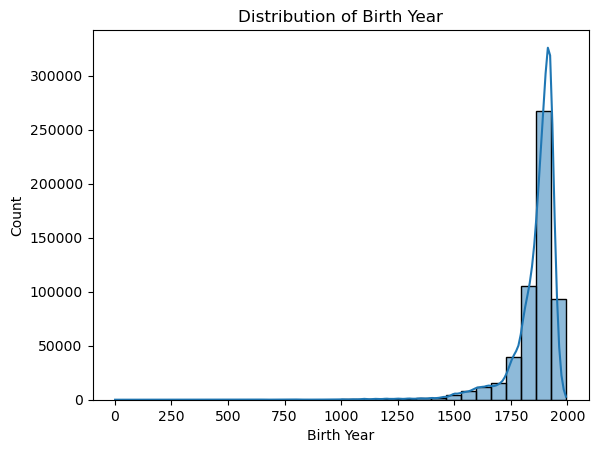

In [34]:
sns.histplot(df["Birth year"], bins=30, kde=True)
plt.title("Distribution of Birth Year")
plt.xlabel("Birth Year")
plt.ylabel("Count")
plt.show()

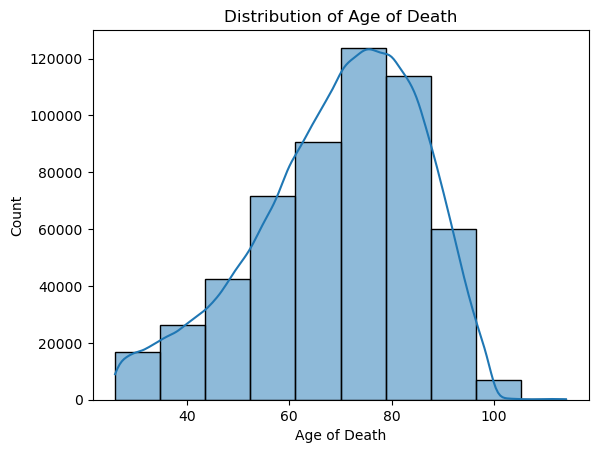

In [35]:
sns.histplot(df["Age of death"], bins=10, kde=True)
plt.title("Distribution of Age of Death")
plt.xlabel("Age of Death")
plt.ylabel("Count")
plt.show()

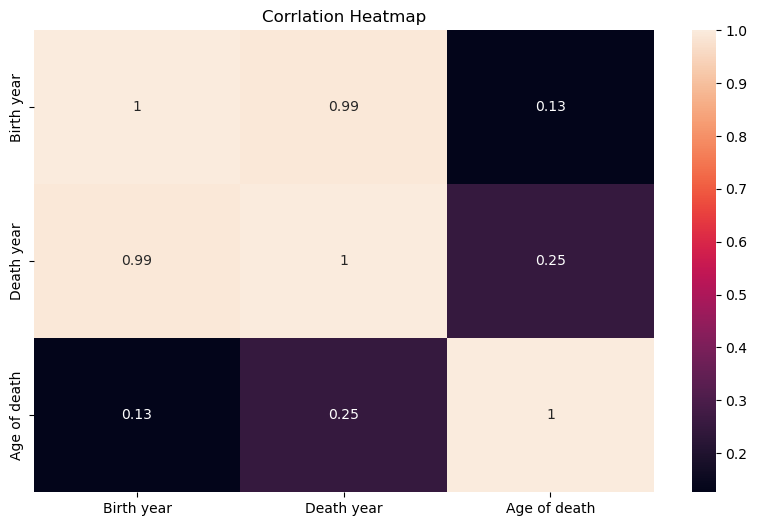

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Corrlation Heatmap")
plt.show()